<a href="https://colab.research.google.com/github/ashishpatel26/Pytorch-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Regression

Simple Linear Regression Basics¶
* Allows us to understand relationship between two continuous variables
* **Example**
* x: independent variable
  * weight
* y: dependent variable
  * height
* y = α x + β

In [ ]:
!nvidia-smi

Thu Mar 18 08:30:47 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
np.random.seed(2021)
n = 50

In [32]:
x = np.random.randn(n)
y = x * np.random.randn(n)

In [33]:
colors = np.random.rand(n)

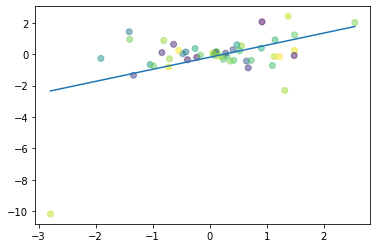

In [35]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y, c=colors, alpha = 0.5)
plt.show()

### Building Linear regression with Pytorch

In [36]:
x_values = [i for i in range(11)]

In [37]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [40]:
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [41]:
x_train = x_train.reshape(-1,1)
x_train.shape

(11, 1)

### Formula

$y = 2x + 1$

In [42]:
y_values = []
for i in x_values:
  result = 2 * i + 1
  y_values.append(result)

In [45]:
y_train = np.array(y_values, dtype = np.float32)
y_train  = y_train.reshape(-1,1)
y_train.shape

(11, 1)

## Building Model

In [46]:
import torch
import torch.nn as nn

In [47]:
class LinearRegression(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

* input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
* desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [49]:
input_dim = 1
output_dim = 1

In [53]:
model = LinearRegression(input_dim, output_dim)

criterion = nn.MSELoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [59]:
!pip install pkbar

In [62]:
import pkbar
train_per_epoch = 100
num_epochs = 100
for epoch in range(num_epochs):

  kbar = pkbar.Kbar(target=train_per_epoch, epoch=epoch, num_epochs=num_epochs, width=8, always_stateful=False)

  epoch += 1

  # Convert nparray into torch variable
  inputs = torch.from_numpy(x_train).requires_grad_()
  labels = torch.from_numpy(y_train)

  # training
  for i in range(train_per_epoch):
    # clear gradient w.r.t parameters
    optimizer.zero_grad()

    # forward to get output
    outputs = model(inputs)

    # calculate loss
    loss = criterion(outputs, labels)
    rmse = torch.sqrt(loss)

    # getting gradient wrt parameter
    loss.backward()

    # updating parameters
    optimizer.step()

    ############################# Update after each batch ##################################
    kbar.update(i, values=[("loss", loss), ("rmse", rmse)])
    ########################################################################################

  # print(f'epoch: {epoch}, loss: {loss.item()}')
  # validation
  outputs = model(inputs)
  val_loss = criterion(outputs, labels)
  val_rmse = torch.sqrt(val_loss)

  ################################ Add validation metrics ###################################
  kbar.add(1, values=[("val_loss", val_loss), ("val_rmse", val_rmse)])
  ###########################################################################################

Epoch: 1/100
100/100 [========] - 0s 617us/step - loss: 1.5779e-04 - rmse: 0.0124 - val_loss: 8.5524e-05 - val_rmse: 0.0092
Epoch: 2/100
100/100 [========] - 0s 427us/step - loss: 5.1332e-05 - rmse: 0.0071 - val_loss: 2.7825e-05 - val_rmse: 0.0053
Epoch: 3/100
100/100 [========] - 0s 418us/step - loss: 1.6700e-05 - rmse: 0.0040 - val_loss: 9.0508e-06 - val_rmse: 0.0030
Epoch: 4/100
100/100 [========] - 0s 414us/step - loss: 5.4327e-06 - rmse: 0.0023 - val_loss: 2.9447e-06 - val_rmse: 0.0017
Epoch: 5/100
100/100 [========] - 0s 425us/step - loss: 1.7673e-06 - rmse: 0.0013 - val_loss: 9.5771e-07 - val_rmse: 9.7863e-04
Epoch: 6/100
100/100 [========] - 0s 452us/step - loss: 5.7496e-07 - rmse: 7.4874e-04 - val_loss: 3.1161e-07 - val_rmse: 5.5822e-04
Epoch: 7/100
100/100 [========] - 0s 429us/step - loss: 1.8705e-07 - rmse: 4.2705e-04 - val_loss: 1.0137e-07 - val_rmse: 3.1838e-04
Epoch: 8/100
100/100 [========] - 0s 431us/step - loss: 6.0866e-08 - rmse: 2.4362e-04 - val_loss: 3.3019e-08 - v

In [63]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.99999267],
       [ 2.9999938 ],
       [ 4.999995  ],
       [ 6.9999967 ],
       [ 8.999997  ],
       [10.999998  ],
       [13.        ],
       [15.000001  ],
       [17.000002  ],
       [19.000004  ],
       [21.000004  ]], dtype=float32)

In [64]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

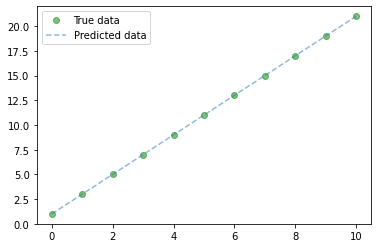

In [65]:
plt.clf()

predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

plt.plot(x_train, y_train, 'go', label='True data', alpha = 0.5)

plt.plot(x_train, predicted, '--', label='Predicted data', alpha = 0.5)

plt.legend(loc = 'best')

plt.show()

In [66]:
save_model = False
if save_model is True:
  model.load_state_dict(torch.load('awesome.pkl'))

### Linear Regression on GPU

In [80]:
import torch
import torch.nn as nn

'''
Step:1 Create Class Model
'''
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    out = self.linear(x)
    return out

'''
Step:2 Initalize the class
'''
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
Step:3 Instatiate loss
'''
criterion = nn.MSELoss()

'''
Step:4 Instatiate Optimizer class
'''
learning_rate = 0.01
optimzer = torch.optim.SGD(model.parameters(), lr = learning_rate)

'''
Step:5 Train the Model
'''
epochs = 100
for epoch in range(epochs):

  epoch += 1

  inputs = torch.from_numpy(x_train).to(device)
  labels = torch.from_numpy(y_train).to(device)

  optimizer.zero_grad()

  outputs = model(inputs)

  loss = criterion(outputs, labels)
  loss.backward()

  optimzer.step()

  print(f"Epoch  : {epoch}, loss : {loss.item()}")

Epoch  : 1, loss : 65.81813049316406
Epoch  : 2, loss : 6.080535888671875
Epoch  : 3, loss : 26.803136825561523
Epoch  : 4, loss : 79.30482482910156
Epoch  : 5, loss : 40.29248046875
Epoch  : 6, loss : 1.2602595090866089
Epoch  : 7, loss : 53.73297882080078
Epoch  : 8, loss : 74.43798828125
Epoch  : 9, loss : 14.657421112060547
Epoch  : 10, loss : 14.583102226257324
Epoch  : 11, loss : 74.25627136230469
Epoch  : 12, loss : 53.473724365234375
Epoch  : 13, loss : 0.8807759284973145
Epoch  : 14, loss : 39.79227066040039
Epoch  : 15, loss : 78.74667358398438
Epoch  : 16, loss : 26.190624237060547
Epoch  : 17, loss : 5.37883186340332
Epoch  : 18, loss : 65.06869506835938
Epoch  : 19, loss : 65.07728576660156
Epoch  : 20, loss : 5.325362205505371
Epoch  : 21, loss : 26.02469253540039
Epoch  : 22, loss : 78.5689468383789
Epoch  : 23, loss : 39.62467575073242
Epoch  : 24, loss : 0.6238564848899841
Epoch  : 25, loss : 53.151119232177734
Epoch  : 26, loss : 73.97216796875
Epoch  : 27, loss : 14.